In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv")
pd.set_option("display.max_columns",None)

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6618,8404-FYDIB,Male,0,No,No,26,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),86.65,2208.75,No
2251,1399-UBQIU,Male,0,No,No,11,Yes,No,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25,No
1321,3161-ONRWK,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),65.85,3928.3,No
6965,7789-CRUVC,Female,1,Yes,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,No
4900,7137-RYLPP,Male,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,3171.15,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
[i for i in df.columns if df[i].dtype=="O"]

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [9]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
df.drop(["customerID"],axis="columns",inplace=True)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.groupby(["gender"]).count()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,,,,,
Female,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488
Male,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555


<BarContainer object of 2 artists>

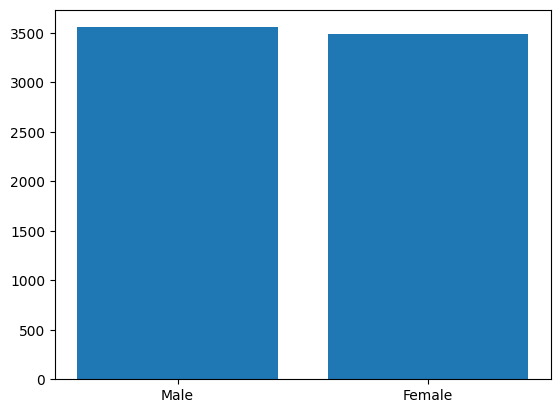

In [14]:
plt.bar(df["gender"].value_counts().index,df["gender"].value_counts().values)

In [15]:
df["gender"].value_counts().index
df["gender"].value_counts().values

array([3555, 3488])

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
def colmns_name(dataf):
  for column in dataf.columns:
    if dataf[column].dtype=="O":
      print(column,'-------->',dataf[column].unique())

In [18]:
df["TotalCharges"]=df["TotalCharges"].apply(lambda x:0 if x==" " else x).astype(float)

In [19]:
colmns_name(df)

gender --------> ['Female' 'Male']
Partner --------> ['Yes' 'No']
Dependents --------> ['No' 'Yes']
PhoneService --------> ['No' 'Yes']
MultipleLines --------> ['No phone service' 'No' 'Yes']
InternetService --------> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --------> ['No' 'Yes' 'No internet service']
OnlineBackup --------> ['Yes' 'No' 'No internet service']
DeviceProtection --------> ['No' 'Yes' 'No internet service']
TechSupport --------> ['No' 'Yes' 'No internet service']
StreamingTV --------> ['No' 'Yes' 'No internet service']
StreamingMovies --------> ['No' 'Yes' 'No internet service']
Contract --------> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --------> ['Yes' 'No']
PaymentMethod --------> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --------> ['No' 'Yes']


In [20]:
  for column in df.columns:
    if df[column].dtype=="O":
      # if "Yes" in df[column].unique():
      print(column,'-------->',df[column].unique())

gender --------> ['Female' 'Male']
Partner --------> ['Yes' 'No']
Dependents --------> ['No' 'Yes']
PhoneService --------> ['No' 'Yes']
MultipleLines --------> ['No phone service' 'No' 'Yes']
InternetService --------> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --------> ['No' 'Yes' 'No internet service']
OnlineBackup --------> ['Yes' 'No' 'No internet service']
DeviceProtection --------> ['No' 'Yes' 'No internet service']
TechSupport --------> ['No' 'Yes' 'No internet service']
StreamingTV --------> ['No' 'Yes' 'No internet service']
StreamingMovies --------> ['No' 'Yes' 'No internet service']
Contract --------> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --------> ['Yes' 'No']
PaymentMethod --------> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --------> ['No' 'Yes']


In [21]:
df.replace({"No internet service":"No","No phone service":"No"},inplace=True)

In [22]:
for column in df.columns:
  if df[column].dtype=="O":
    if "Yes" in df[column].unique():
      df[column]=df[column].apply(lambda x:1 if x=="Yes" else 0)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
df2=pd.get_dummies(data=df,columns=["gender","InternetService","Contract","PaymentMethod"])

In [25]:
df2.sample(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4973,1,1,0,13,1,1,1,1,0,0,0,1,0,93.80,1261.00,0,0,1,0,1,0,1,0,0,0,1,0,0
595,0,0,0,12,1,1,1,0,1,1,0,0,1,61.65,713.75,1,1,0,1,0,0,1,0,0,0,0,0,1
2778,0,0,0,13,1,0,0,1,0,0,0,0,1,74.65,966.25,0,1,0,0,1,0,0,1,0,0,0,0,1
4702,1,0,0,54,0,0,0,1,1,0,1,1,1,55.45,2966.95,0,0,1,1,0,0,0,1,0,0,0,1,0
6558,0,0,0,16,1,0,0,0,0,0,0,0,0,20.25,327.45,1,0,1,0,0,1,1,0,0,1,0,0,0


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scale=MinMaxScaler()

In [28]:
columns=["tenure","MonthlyCharges","TotalCharges"]

In [29]:
df2[columns]=scale.fit_transform(df2[columns])

In [30]:
df2.sample(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3812,0,0,0,0.236111,1,0,0,0,0,0,0,0,1,0.013930,0.040479,0,0,1,0,0,1,0,1,0,1,0,0,0
535,0,0,0,0.166667,1,1,0,0,1,0,1,0,1,0.709453,0.117648,0,0,1,0,1,0,1,0,0,0,0,1,0
2452,1,0,0,0.208333,1,1,0,0,0,0,0,0,1,0.556716,0.130561,1,0,1,0,1,0,1,0,0,0,1,0,0
5649,0,1,0,0.458333,1,0,0,0,0,0,0,0,0,0.017910,0.077083,0,1,0,0,0,1,1,0,0,0,0,0,1
5928,0,1,1,0.847222,1,0,0,0,0,0,0,0,0,0.014925,0.151022,0,1,0,0,0,1,0,0,1,0,1,0,0


In [31]:
x=df2.drop(["Churn"],axis="columns")
y=df2["Churn"]

In [32]:
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.003437,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.217564,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.012453,0,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.211951,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.017462,1,0,0,1,0,1,0,0,0,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
def biuld_model(hp):
  model=keras.models.Sequential([
      keras.layers.Dense(units=hp.Choice("units",[1,5,10,15,20,25,30]),
                         input_shape=(27,),
                         kernel_initializer="he_uniform",
                         activation=hp.Choice("activation",["relu","sigmoid","softmax"])
                         ),
       keras.layers.Dense(units=hp.Choice("units",[1,5,10,15,20,25,30]),
                         kernel_initializer="he_uniform",
                         activation=hp.Choice("activation",["relu","sigmoid","softmax"])
                         ),
       keras.layers.Dense(units=1,activation="sigmoid"),
  ])
  model.compile(optimizer=hp.Choice("optimizer",["Adam"]),loss="binary_crossentropy",
                metrics=["accuracy"])
  return model

In [36]:
import keras_tuner

In [37]:
tuner=keras_tuner.RandomSearch(biuld_model,objective="val_accuracy",max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [38]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Choice)
{'default': 1, 'conditions': [], 'values': [1, 5, 10, 15, 20, 25, 30], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'softmax'], 'ordered': False}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam'], 'ordered': False}


In [39]:
tuner.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

In [40]:
model=tuner.get_best_models(num_models=1)[0]

In [59]:
model.fit(X_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8024 - val_loss: 0.4058 - val_accuracy: 0.8262
Epoch 2/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4112 - accuracy: 0.8030 - val_loss: 0.4061 - val_accuracy: 0.8245
Epoch 3/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8030 - val_loss: 0.4069 - val_accuracy: 0.8209
Epoch 4/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8039 - val_loss: 0.4062 - val_accuracy: 0.8227
Epoch 5/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8055 - val_loss: 0.4081 - val_accuracy: 0.8191
Epoch 6/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8034 - val_loss: 0.4070 - val_accuracy: 0.8280
Epoch 7/10
159/159 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8049 - val_loss: 0.4068 - val_accuracy: 0.8209
Epoch 

In [52]:
y_pred=[0 if i<0.5 else 1 for i in model.predict(X_test)]

45/45 [==============================] - 0s 2ms/step


In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
print(accuracy_score(y_test,y_pred))

0.7955997161107168


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<Axes: >

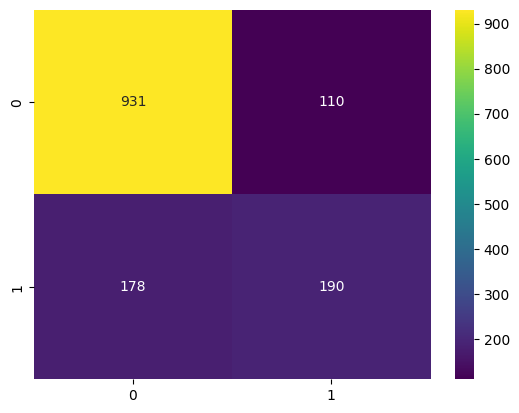

In [58]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",cmap="viridis",annot=True)